In [56]:
using PyPlot

In [1]:
#We need an object that has two methods: the parameters, which are its location in parameter space
#and chi2 of the model calculated from the walker's position compared to the data
type walker
    params::Array{Float64}
    chi2::Float64
end

In [2]:
#This is an object that records a given walker's position and chi2 across multiple steps 
type walker_record
    walkers::Array{walker}
end

In [3]:
#enter each walker's record as an element of an array, one entry for each walker
type walker_array
    recs::Array{walker_record}
end

In [4]:
#how to add a walker into a walker record, and a walker record into an array of walkers
import Base.push!
function push!(rec::walker_record,w::walker)
    push!(rec.walkers,w)
end
function push!(arr::walker_array,rec::walker_record)
    push!(arr.recs,rec)
end

push! (generic function with 17 methods)

In [5]:
#Types are all working!
foo = walker([1.0],1)
bar = walker([1.0],1)
baz = walker_record([foo,bar])
baz.walkers
push!(baz,walker([1.0],1))
bash = walker_array([baz])
push!(bash,baz)
bash

walker_array([walker_record([walker([1.0],1.0),walker([1.0],1.0),walker([1.0],1.0)]),walker_record([walker([1.0],1.0),walker([1.0],1.0),walker([1.0],1.0)])])

In [6]:
type model #contains a function, from which we can calculate our parameters
    f::Function
    nparams::Int8
end

In [137]:
#returns chi2 at a position in parameter space
chi2(modl::model,params::Array{Float64},data::Array{Float64,2}) = sum(((modl.f(data[1],params)-data[2])/data[3]).^2)

chi2 (generic function with 2 methods)

In [138]:
function init_walkers(modl::model,p0::Array{Float64},p_err::Array{Float64},data::Array{Float64,2})
    nparam = modl.nparams
    nwalkers::Float64 = nparam*3.0
    chi_best = chi2(modl,p0,data)
    w_array = walker_array(walker_record[])
    for j=1:nwalkers
        chi_trial = 1.0e100
        par_trial = p0
        while chi_trial > (chi_best + 1000)
            par_trial = p0 + p_err.*randn(nparam)
            chi_trial = chi2(modl,par_trial,data)
        end
        w = walker(par_trial,chi_trial)
        push!(w_array,walker_record([w]))
    end
    return w_array
end

init_walkers (generic function with 2 methods)

In [139]:
function plot_walkers(w_array::walker_array,p1::Int64,p2::Int64)
    pones = Float64[]
    ptwos = Float64[]
    for rec in w_array.recs
        push!(pones,rec.walkers[end].params[p1])
        push!(ptwos,rec.walkers[end].params[p2])
    end
    scatter(pones,ptwos)
end

plot_walkers (generic function with 2 methods)

In [140]:
function walk(w::walker,partner::walker,ascale::Float64,modl::model,data::Array{Float64,2})
    #Takes a walker and a partner, picks a new trial step based on parameters
    z=(rand()*(sqrt(ascale)-1.0/sqrt(ascale))+1.0/sqrt(ascale))^2
    par_trial = z.*w.params.+(1.0-z).*partner.params
    # Compute chi-square:    
    chi_trial=chi2(modl,par_trial,data)
    alp = z^(modl.nparams-1)*exp(-0.5*(chi_trial - w.chi2))
    return walker(par_trial,chi_trial),alp
end

walk (generic function with 1 method)

In [135]:
function mcmc(data::Array{Float64,2},modl::model,p0::Array{Float64},p_err::Array{Float64},nsteps::Int64)
    w_array = init_walkers(modl,p0,p_err,data)
    nparam = modl.nparams
    nwalkers = nparam*3.0
    ascale = 2.0
    accept = 0
    for i=2:nsteps
        println(typeof(i))
        #Like j = nwalkers, but now we can access the walkers directly!
        for (j,rec) in enumerate(w_array.recs)
            current_w = rec.walkers[end]
            ipartner = j
            while ipartner == j
                ipartner = ceil(Int,rand()*nwalkers)
            end
            partner_w = w_array.recs[ipartner].walkers[end]
            # Now, make a trial walker
            (trial_w,alp) = walk(current_w,partner_w,ascale,modl,data)
            if alp >= rand()
            # If step is accepted, add it to the chains!
                push!(rec,trial_w)
                accept = accept + 1
            else
            # Otherwise, copy the current walker
                push!(rec,current_w)
            end
        end
        if mod(i,1000) == 0
            frac_acc = accept/(1000*nwalkers)
            println("Number of steps: $i, acceptance rate: $frac_acc")
            ascale = 1.0 + (frac_acc/0.25)*(ascale-1.0)
            accept = 0
        end
    end
    plot_walkers(w_array,1,2)
# Now, determine time of burn-in by calculating first time median is crossed:
    #iburn = 0
    #for i=1:nparam
    #  med_param=median(par_mcmc[1:nwalkers,1:nsteps,i])
    #  for j=1:nwalkers
    #    istep=2
    #    while (par_mcmc[j,istep,i] > med_param) == (par_mcmc[j,istep-1,i] > med_param) && (istep < nsteps)
    #      istep=istep+1
    #    end
    #    if istep >= iburn
    #      iburn = istep
    #    end
    #  end
   # end
end

mcmc (generic function with 1 method)

Int64


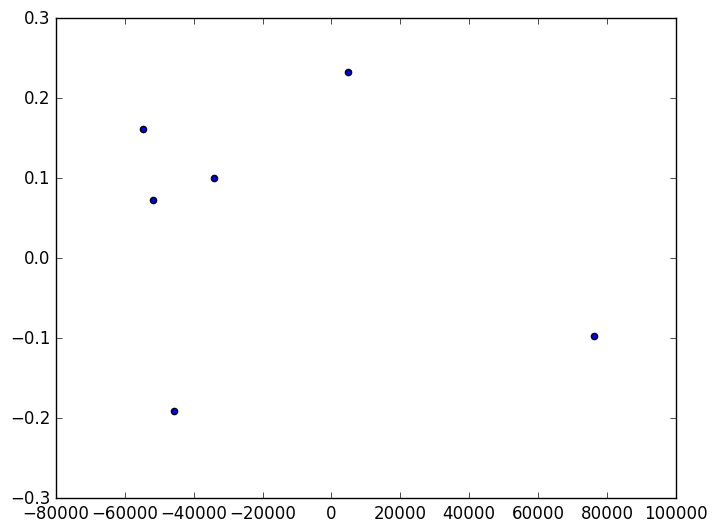

PyObject <matplotlib.collections.PathCollection object at 0x31f30ded0>

Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int6

In [136]:
mcmc(data,mod,p0,perr,100)

In [100]:
for (j,rec) in enumerate(foo.recs)
    current_w = rec.walkers[end]
    ipartner = j
    while ipartner == j
        ipartner = ceil(Int,rand()*6.0)
    end
    partner_w = foo.recs[ipartner].walkers[end]
    
# Now, choose a new set of parameters for the trial step:
    z=(rand()*(sqrt(2.0)-1.0/sqrt(2.0))+1.0/sqrt(2.0))^2
    
    par_trial = z.*current_w.params.+(1.0-z).*partner_w.params
# Compute chi-square:    
    chi_trial=chi2(modl,par_trial,data)
# Next, determine whether to accept this trial step:
    alp = z^(2.0-1)*exp(-0.5*(chi_trial - current_w.chi2))
#if alp >= rand()
# If step is accepted, add it to the chains!
    push!(rec,current_w)
#accept = accept + 1
#else
# If step is rejected, then copy last step:
#par_mcmc[j,i,:] = par_mcmc[j,i-1,:]
#chi_mcmc[j,i,:] = chi_mcmc[j,i-1]
#end
end
foo

walker_array([walker_record([walker([1.0547769481783962,1.0641736171448413],18.393644843247706),walker([1.106029547537563,1.0858663335596213],19.240491809735556),walker([1.106029547537563,1.0858663335596213],19.240491809735556)]),walker_record([walker([0.849555716536769,1.0777914272736715],18.923034381536993),walker([0.5959161788548364,1.0698057568089647],18.611682329717095),walker([0.5959161788548364,1.0698057568089647],18.611682329717095)]),walker_record([walker([0.7866075417973944,0.9631777277350361],14.701854763090092),walker([0.6950190546615742,0.8215558906676025],10.220818642181204),walker([0.6950190546615742,0.8215558906676025],10.220818642181204)]),walker_record([walker([0.9940802349028559,1.0384836696132334],17.415402210821135),walker([1.0061383892421387,1.047230203138226],17.74545882776781),walker([1.0061383892421387,1.047230203138226],17.74545882776781)]),walker_record([walker([0.9631221305588276,1.2361194599477947],25.629286645282882),walker([0.9710023529686838,1.2015165121

In [86]:
mod_trial(x,p) = p[1].*x+p[2]
modl = model(mod_trial,2)
xdata = collect(linspace(0,1,10))
ydata = mod_trial(x_data,[1.,1.])+rand(10)
yerr = rand(10)
data = hcat(xdata,ydata,yerr)
p0 = [0.9,1.1]
perr = [0.1,0.1]
foo = init_walkers(modl,p0,perr,data)

1walker_record

LoadError: LoadError: BoundsError: attempt to access 6-element Array{walker_record,1}:
 walker_record([walker([1.0547769481783962,1.0641736171448413],18.393644843247706)])
 walker_record([walker([0.849555716536769,1.0777914272736715],18.923034381536993)]) 
 walker_record([walker([0.7866075417973944,0.9631777277350361],14.701854763090092)])
 walker_record([walker([0.9940802349028559,1.0384836696132334],17.415402210821135)])
 walker_record([walker([0.9631221305588276,1.2361194599477947],25.629286645282882)])
 walker_record([walker([0.7871189828492219,0.9849270163819002],15.461973285160225)])
  at index [7]
while loading In[86], in expression starting on line 10

([walker([0.849555716536769,1.0777914272736715],18.923034381536993)])
2walker_record([walker([0.7866075417973944,0.9631777277350361],14.701854763090092)])
3walker_record([walker([0.9940802349028559,1.0384836696132334],17.415402210821135)])
4walker_record([walker([0.9631221305588276,1.2361194599477947],25.629286645282882)])
5walker_record([walker([0.7871189828492219,0.9849270163819002],15.461973285160225)])


# To do: make all the necessary types. Model/data types?
# Make all the necessary functions to compute chi2, burnin, whatever
# Make a function that runs mcmc, returns list of walker positions